# ch04.04. 분류문제 EDA - titanic
---
* 날짜: 2022.05.11
* 이름: 윤태우

## 학습내용
    - titanic 데이터 EDA
    - 분류문제 에서의 탐색적 데이터 분석 진행


## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [59]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

* seaborn에서 제공하는 `titanic` 데이터셋을 불러오기

In [60]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

* 데이터셋 일부 확인

In [61]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [62]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

* 결측지 비율 확인

In [63]:
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### **| 기술통계**

* `info` 이용해 데이터 확인

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


* 숫자 자료형의 기술 통계

In [65]:
df.describe()

# survived 와 plcass, sibsp, parch는 이산형 자료이다.

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 숫자 자료형 외의 기술 통계

In [66]:
df_d1 = df.describe(include = ['object', 'category', 'bool'])

* 숫자 자료형 외 값 및 개수 확인

In [67]:
print(f'{df_d1.columns}, counts : {len(df_d1.columns)}')

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object'), counts : 9


### **| 변수 요약**

* 속성을 그리기전 bool 값을 가지는 속성 `adult_male`과 `alone`을 int 값으로 변환해야 합니다.

In [68]:
df['adult_male'].replace([False,True],[0,1], inplace = True)
df['alone'].replace([False,True],[0,1], inplace = True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1


* 모든 속성의 분포 간단히 그리기

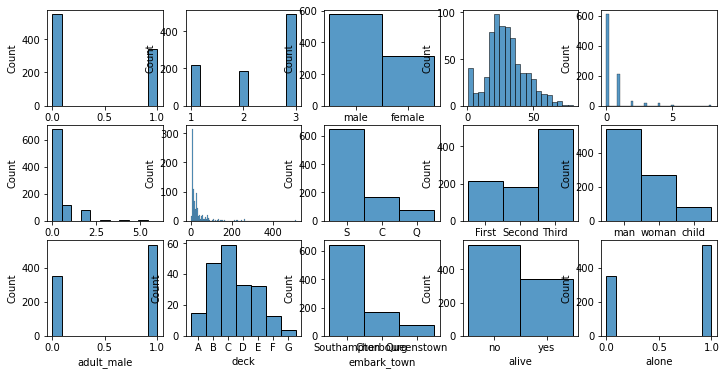

In [69]:
f, axes = plt.subplots(3,5, figsize = (12,6))
axes = axes.flatten()
for col, ax in zip(df.columns, axes) :
  sns.histplot(data = df, x=col, ax=ax)
plt.show()

* 자료형 정리하기

In [70]:
df.describe().columns, df_d1.columns

(Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
        'alone'],
       dtype='object'),
 Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
        'alive', 'alone'],
       dtype='object'))

In [71]:
# 연속형/수치형 : ['age', 'fare', , 'alone']
# 범주형/이산형 : ['parch','sibsp','pclass','survived','sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town','alive', 'alone']

* 데이터 정리하기
  * 데이터 소개: 타이타닉호 사망자 또는 생존자의 정보
  * 자료형 소개 :
  - survived : 0=사망, 1=생존
  - pclass : 좌석 등급
  - sibsp : 동승 자매, 배우자 수
  - parch : 동승 부모님, 자녀 수
  - fare : 요금
  - cabin : 방 호수
  - embarked, embark_town : 탑승지 (embarked는 탑승지 약자)
  * 모델링을 위한 자료형 구분:
   - 연속형 : ['age', 'fare', , 'alone']
    - 범주형 :  ['parch','sibsp','pclass','survived','sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town','alive', 'alone']


## 데이터 분포
---

### **| 데이터 분포 시각화**

In [72]:
nums = ['age', 'fare']
noms = ['parch','sibsp','pclass','survived','sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town','alive', 'alone']

* 연속 자료형 분포 그리기

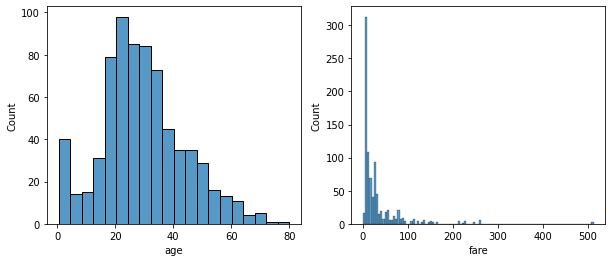

In [73]:
f, axes = plt.subplots(1, len(nums), figsize = (10,4))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.histplot(data = df, x=col, ax=ax)
plt.show()

* 이산 자료형 분포 그리기

In [74]:
len(noms)

13

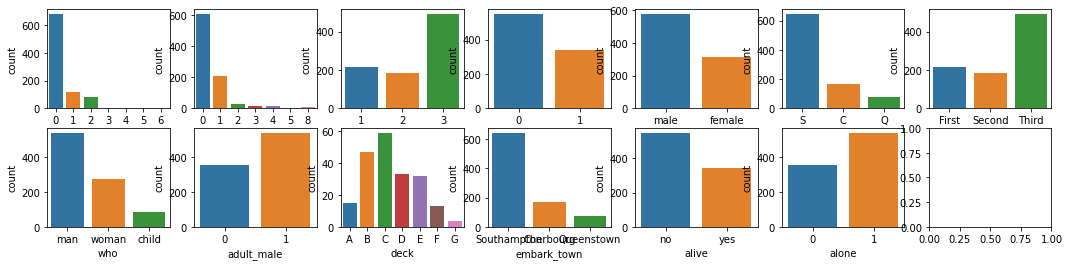

In [75]:
f, axes = plt.subplots(2, 7, figsize = (18,4))
axes = axes.flatten()
for col, ax in zip(noms, axes) :
  sns.countplot(data = df, x=col, ax=ax)
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [76]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694,0.602694
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [77]:
df[noms].describe()

,parch,sibsp,pclass,survived,adult_male,alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.381594,0.523008,2.308642,0.383838,0.602694,0.602694
std,0.806057,1.102743,0.836071,0.486592,0.489615,0.489615
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000
75%,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,6.000000,8.000000,3.000000,1.000000,1.000000,1.000000


* boxplot 으로 연속 자료형 기술 통계 시각화하기

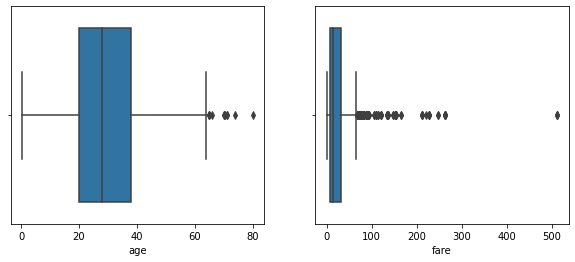

In [78]:
f, axes = plt.subplots(1, len(nums), figsize = (10,4))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.boxplot(data = df, x=col, ax=ax)
plt.show()

* viloinplot 으로 연속 자료형 기술 통계 시각화하기

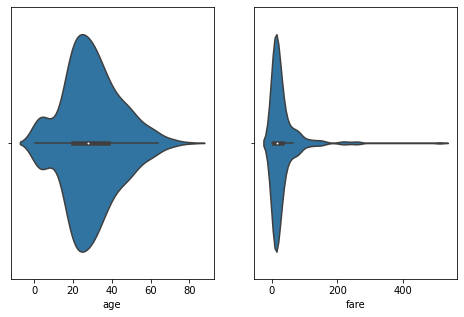

In [79]:
f, axes = plt.subplots(1, len(nums), figsize = (8,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.violinplot(data = df, x=col, ax=ax)
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [80]:
df.skew()

survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64

* `kurt` 이용해 첨도 구하기

In [81]:
df.kurt()

survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64

### **| 예측값에 대한 추가 시각화**

* `countplot`으로 그리기


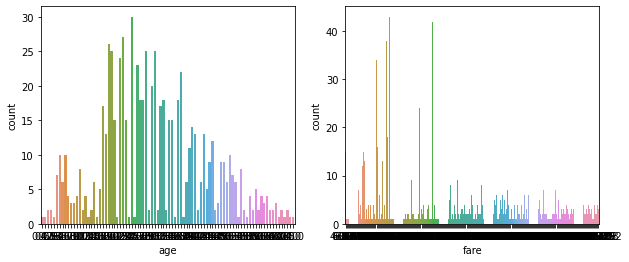

In [82]:
# 이산형 자료들은 위에서 countplot을 그렸기 때문에 연속형 자료를 나타내봤다.
f, axes = plt.subplots(1, len(nums), figsize = (10,4))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.countplot(data = df, x=col, ax=ax)
plt.show()

* `hue` 옵션에 범주형 속성 추가하기

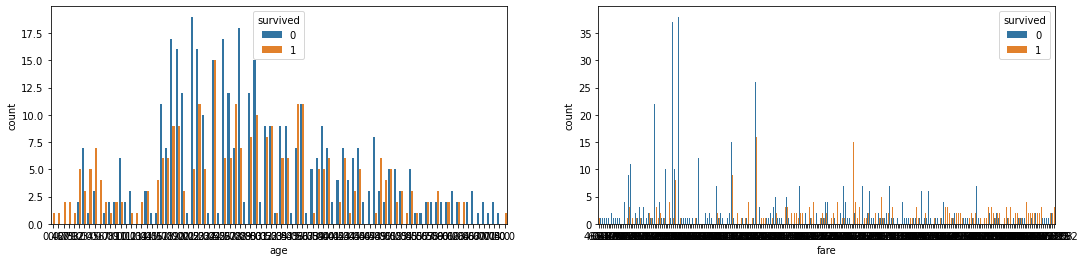

In [84]:
f, axes = plt.subplots(1, len(nums), figsize = (18,4))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.countplot(data = df, x=col, ax=ax, hue = 'survived')
plt.show()

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [85]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


* `style.background_gradient` 이용해 상관계수 시각화 하기

In [86]:
df.corr().style.background_gradient(cmap = "coolwarm")

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


* `heatmap` 이용해 상관계수 시각화 하기

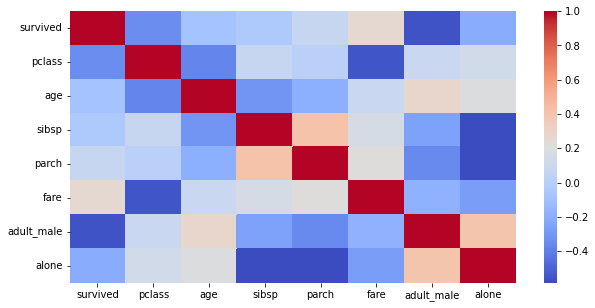

In [87]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap = 'coolwarm')

* 상관관계가 높은 속성 정리하기




In [89]:
# adult_male (성인 남자)가 있을 수록 생존률이 낮음.
# 요금이 높을수록 pclass가 낮음.
# -> pclass는 객실 등급인데 낮을수록 비싸고 좋은 방이라는 것을 알 수 있음.


array([1, 0])

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

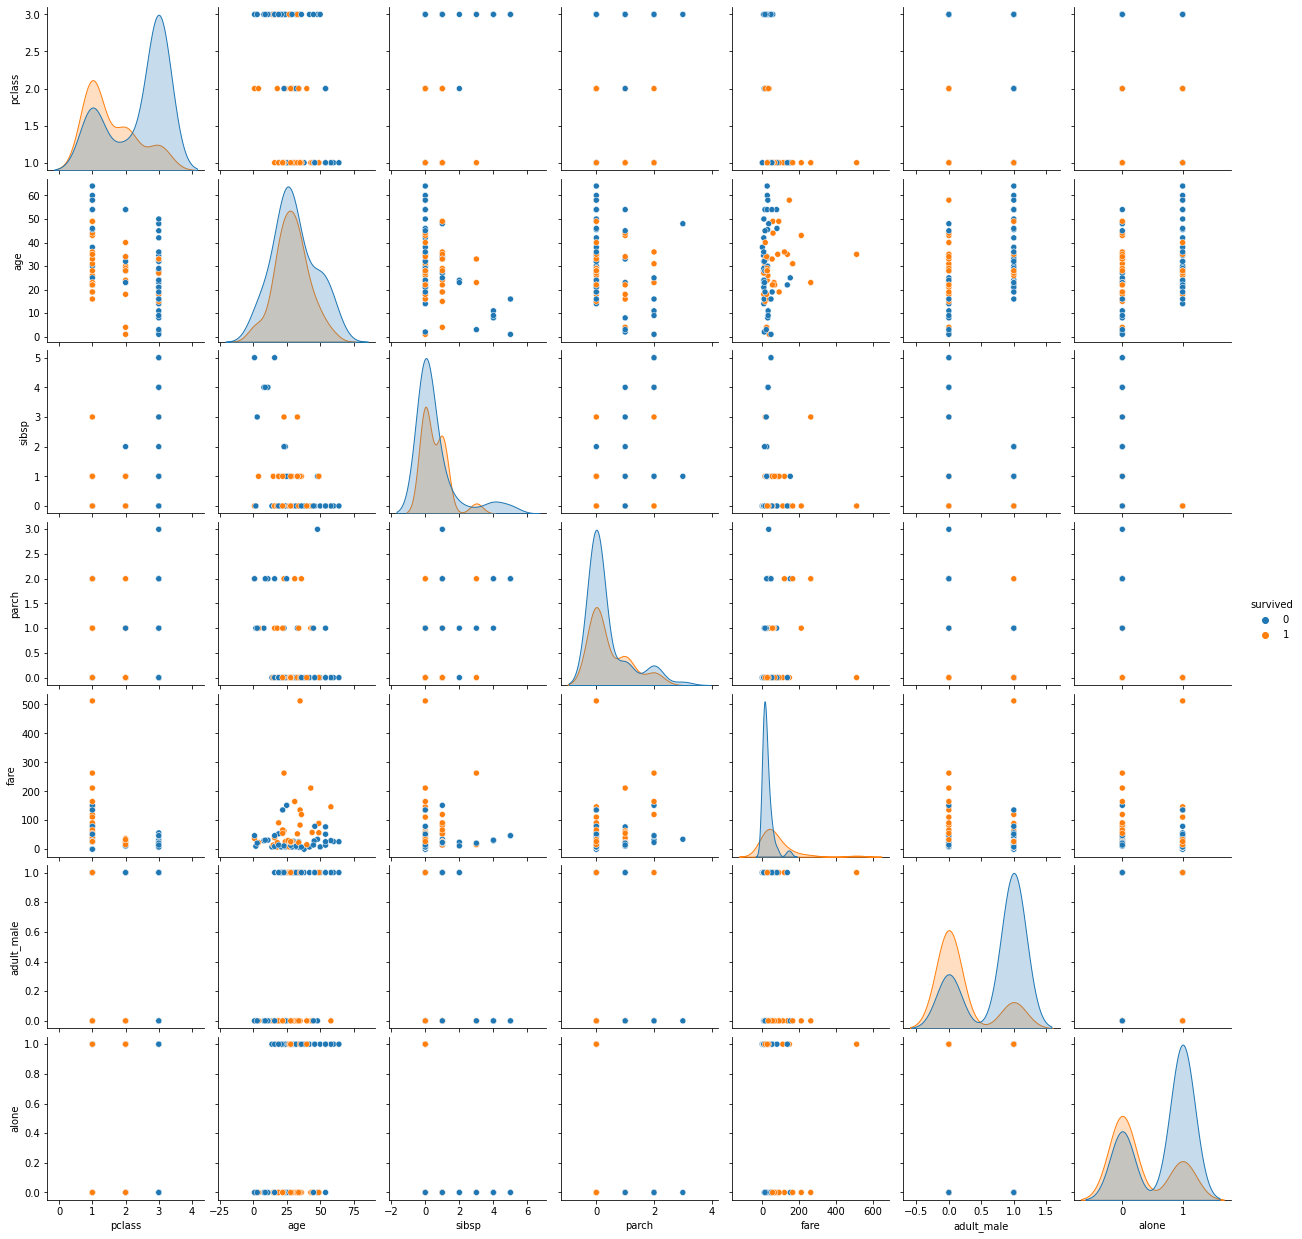

In [90]:
# pairplot 은 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그리는게 좋습니다.
sns.pairplot(df.sample(100), hue = 'survived')

* `displot` 이용해 연속 자료형 별 예측값의 분포 `kde` 선으로 시각화 하기 

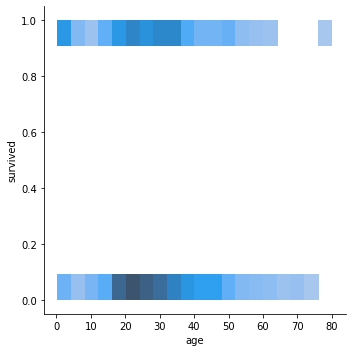

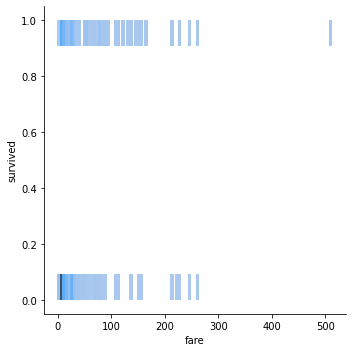

In [99]:
for num in nums :
  sns.displot(data = df, x = df[num], y = 'survived')
plt.show()

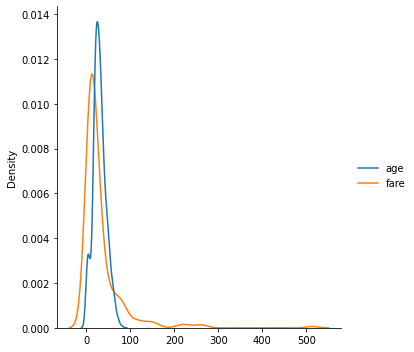

In [117]:
sns.displot(data = df[nums], kind = 'kde')

* 위에서 그린 플롯에 `col` 옵션으로 `sex` 추가하기

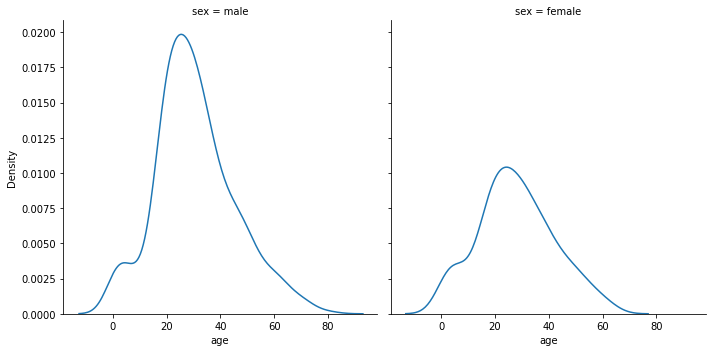

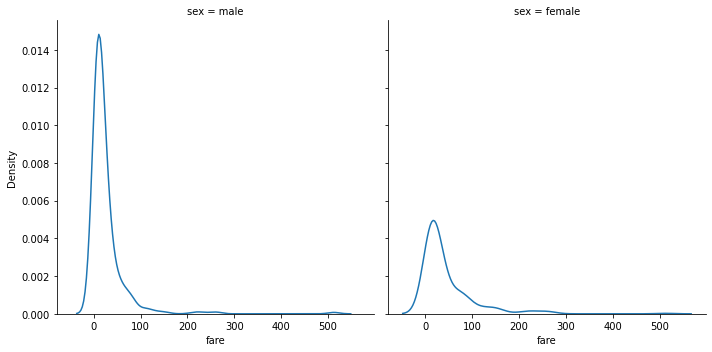

In [121]:
for num in nums :
  sns.displot(data = df, x = num, kind = 'kde', col = 'sex')

* 위에서 그린 플롯에 `hue` 옵션으로 `class` 추가하기

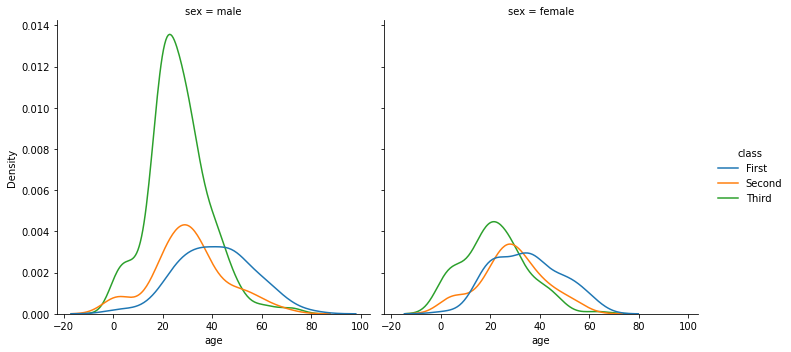

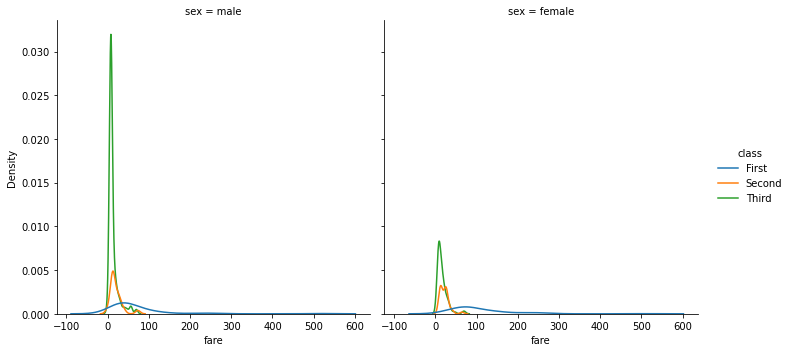

In [122]:
for num in nums :
  sns.displot(data = df, x = num, kind = 'kde', col = 'sex', hue = 'class')

* `age`과 `fare`의 산점도를 그리고 `hue`옵션에 예측값 추가하기

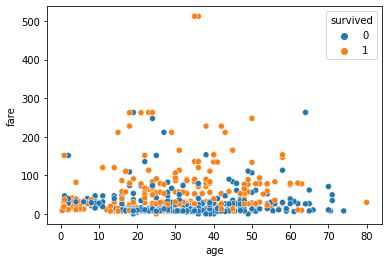

In [123]:
sns.scatterplot(data = df, x = 'age', y = 'fare', hue = 'survived')
plt.show()

* `lmplot`을 이용해 위의 산점도를 다시 그리고 `col` 옵션에 `class` 추가하기

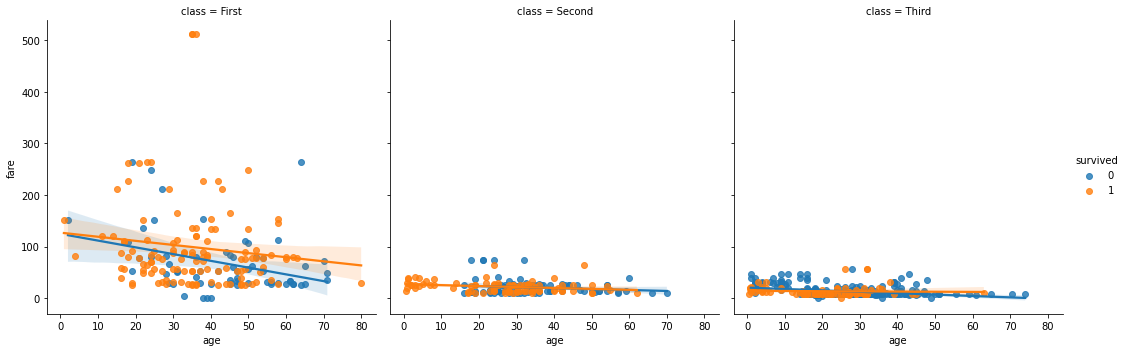

In [124]:
sns.lmplot(data = df, x = 'age', y = 'fare', hue = 'survived', col = 'class')
plt.show()

* `histplot`으로 범주형 속성들과 예측값 히트맵 그리기

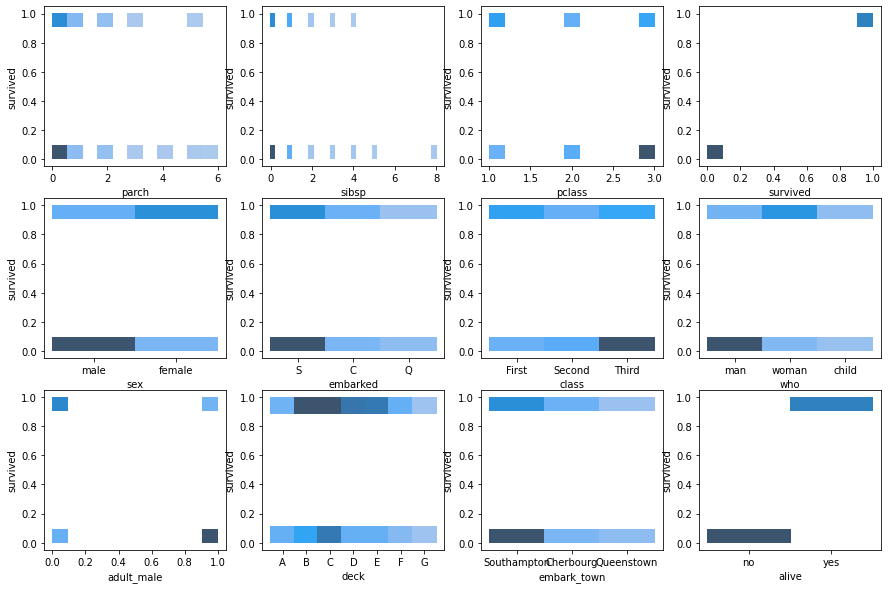

In [126]:
fig, axes = plt.subplots(3, 4, figsize = (15, 10))
axes = axes.flatten()
for col, ax in zip(noms, axes):
    sns.histplot(data = df, x = col, y = 'survived', ax = ax)